In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import networkx as nx
from matplotlib.animation import FuncAnimation, PillowWriter
import os
from PIL import Image
import glob

### Elementary cellular automata
A basic set of cells consists of 3 adjacent cells. The center cells has two neighbors; one on the left and another one on the right. The most basic set of states these cells could have is 0 and 1. So one set of cell could be 001, 010, 110, 000, etc...

The number of possible combinations in a set of cells would be 2^3 = 8. 

How would the next generation of cells be produced? The state of the next cell is determined by the combination of states of the set of cells before it. Example: 001-> 1 or 0. Since there are 8 possible combinations of states, there are 2^8=256 possible combinations of rules: 2(possible combinations from one set)*2(possible combinations from another set)*etc..



### Notes on step function

***np.roll(array, number of steps)*** cycles a step/s in a row of array. (+1) for positive cycle, (-1) for negative cycle.

***np.vstack((array1,array2,...))*** stacks arrays on top of each other. Similar to a concatenation. Stacked arrays must be of shape (N,).

***numpy.ndarray.astype(np.int8)*** copies the array and turns the elements to integer.


***numpy.sum(array, axis)*** sum of array elements over a given axis.

How this function works:
1. x_shift_right/left shifts the elements of the array right and left in a cyclic manner. 

2. The original array and the shifted arrays are stacked on top of each other. 

3. The elements of the column of the stacked arrays is multiplied to the powers_of_two array and then summed together. 
    This step converts the combination of cell states into a number between 0 to 7.

4. The sum is subtracted to 7. 

This means that each column would correspond to a number between 0 to 7.

Now we have numbers corresponding to each state of the cells. These numbers will dictate the next generation of cells.

We need to pass this set of numbers through a 'rule' to get the next generation of cells. There are 256 rules in cellular automata. Each of these rules correspond to a binary representation. E.g 10000000 is rule 1; 10110101 is 181. 

Now we want each number from 0 to 7 to correspond to an element in the string of binary code. 

Example: for the code 10000000
0 -> 1,

1 -> 0,

2 -> 0,

3 -> 0,

4 -> 0,

5 -> 0,

6 -> 0,

7 -> 0


How do we implement this?

We can use the command numpy.binary_repr(integer, width=integer). It takes an integer number and turns it into binary. The width input forces the function to output the width amount of numbers. If width is specified to be 8 then the integer 0 is written as 00000000 instead of just 0.

numpy.binary_repr outputs string value. We just need to convert this string into array in order to have a label for each number in the string.  

In [2]:
def step_function(cells,rule_number):
    powers_of_two = np.array([[1],[2],[4]])
    cell_neighbor_left = np.roll(cells, +1)
    cell_neighbor_right = np.roll(cells, -1)
    vstacked = np.vstack((cell_neighbor_left,cells,cell_neighbor_right)).astype(np.int8)
    z =np.sum(powers_of_two*vstacked,axis=0).astype(np.int8)
    
    return rule_number[7-z]

In [3]:
powers_of_two = np.array([[1],[2],[4]])
y = np.array([[1,0,1],[1,1,0],[0,1,1]])
z = np.sum(powers_of_two*y,axis=0).astype(np.int8)
7-z

array([4, 1, 2], dtype=int8)

In [4]:
def cellular_automata(rule_number, size, step_count):
    assert 0<=rule_number<=225
    
    rule_str = np.binary_repr(rule_number,width=8)
    rule = np.array([int(ch) for ch in rule_str], dtype=np.int8)
    x = np.zeros((step_count,size),dtype=np.int8)
    
    x[0,size//2]=1
    for i in range(step_count-1):
        x[i+1,:]=step_function(x[i,:], rule)
    return x
        

In [5]:
rule_number = 90  # select the update rule
size = 100  # number of cells in one row
steps = 100  # number of time steps
init_cond='impulse'  # start with only one cell
impulse_pos='center'  # start with the central cell

x = cellular_automata(rule_number, size, steps)



### Visualizing Elementary CA
plt.figure (figsize = (#height(float),#width(float)), sets dimensions of the figure

ax = plt.axes, sets axes to the figure]

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axes.html

ax.set_axis_off(), turns off the axis of the figure. i.e no ticks, no marks 

ax.imshow(#array(this is your image data), #interpolation => none (types of rendering(?), setting to none creates distinct squares, #cmap = colormap)

https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html

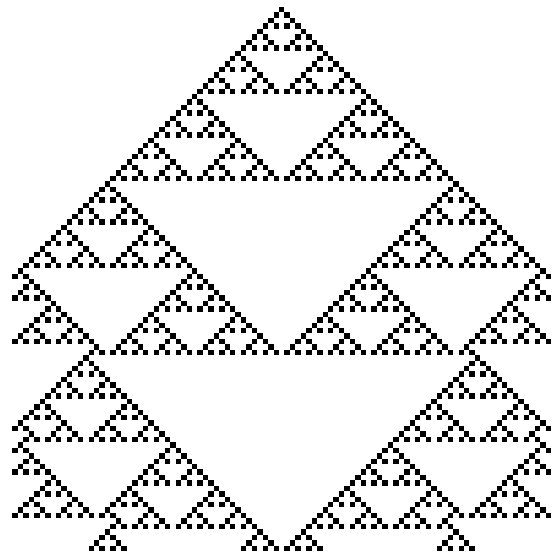

In [6]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes()
ax.set_axis_off()

ax.imshow(x, interpolation='none', cmap = 'binary')
plt.savefig('elementary_cellular_automaton.png', dpi=300, bbox_inches='tight')

### Animating ECA

In [20]:
rule_number = 90  # select the update rule
size = 100  # number of cells in one row
steps = 100  # number of time steps
init_cond='impulse'  # start with only one cell
impulse_pos='center'  # start with the central cell
x_a = cellular_automata(rule_number, size, steps)

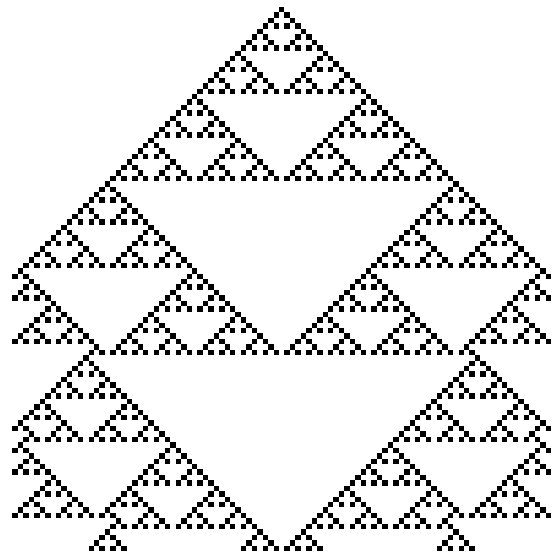

In [21]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes()
ax.set_axis_off()

ax.imshow(x_a, interpolation='none', cmap = 'binary')
plt.savefig('elementary_cellular_automaton_long.png', dpi=300, bbox_inches='tight')

In [ ]:


steps_to_show = 100 #number of steps shown in the animation window
iterations_per_frame=1 # number of steps to show per frame
steps = 500 # number of time steps
frames = int(500//iterations_per_frame) #number of frames in the animation
interval = 50 #interval in ms between consecutive frames

fig = plt.figure(figsize = (10,10))

ax = plt.axes()
ax.set_axis_off()

def animate(i):
    ax.clear() #clear the plot
    ax.set_axis_off #disable axis
    
    Y = np.zeros((steps_to_show, size), dtype = np.int8) #creates a zero matrix of the desired dimensions
    upper_boundary = (i+1)*iterations_per_frame # window upper boundary
    lower_boundary = 0 if upper_boundary <= steps_to_show else upper_boundary - steps_to_show # window lower bound
    for t in range (lower_boundary, upper_boundary): #assign the values
        Y[t - lower_boundary, :] = x_a[t,:]
    
    img = ax.imshow(Y,interpolation='none',cmap='RdPu')
    return [img]

anim = animation.FuncAnimation(fig, animate, frames=frames, interval=50, blit=True)
anim.save('elementary_cellular_automaton.gif', writer='Pillow') 


### Animating ECA
FuncAnimation is a hassle to work with. It also demands large memory since it has to run in the background all the time. An alternative way of animating is by creating .png's of each step and compiling them all into a single .gif using glob. This will take a longer time than FuncAnimation but the process is more intuitive in my opinion.  

We first create the cells that we want to show for the entirety of the animation. We are using rule number 90. We have 50 cells in one row and we want to show 120 steps of its evolution starting from a single dot at the center. Each fram of the animation will show one step of the evolution. 

x_test is the array that contains the entire evolution.


In our animation, we will only be able to see a fixed number of steps i.e we will only show 10 out of the 120 rows at any given time. This means that we have to make a separate array from x_test. An array that contains the cells that we will see on our .png's.

We will assign Y_test to be this array. 



We create a for loop for the number of steps we want to show in the entire duration. This is where the variable duration comes in. Each Y_test row is equated to the corresponding x_test row. 


This works fine until i=10 wherein the iterator reaches the bottom of the Y_test array. The program won't show any more steps. 

We can work around this by making the bounds of the Y_test array move. The upper and lower bounds of the array moves with the iterator when i becomes greater than 10. It's like a Y_test is a view finder spanning across the entire length of x_test. 



In [130]:
rule_number = 90  # select the update rule
size = 50  # number of cells in one row
steps = 120 # number of time steps
init_cond='impulse'  # start with only one cell
impulse_pos='center'  # start with the central cell

x_test = cellular_automata(rule_number, size, steps)


duration = 100

steps_to_show = 10    

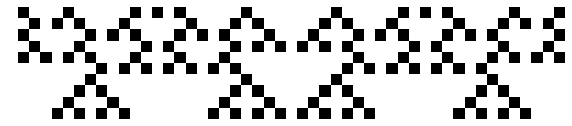

In [131]:
fig = plt.figure(figsize = (10,50))
ax = plt.axes()
ax.set_axis_off()
path_to_save = '/Users/xydagapito/Downloads/ElementaryCA/'
for i in range(duration):
    upper_bound = (i+1)
    lower_bound = 0 if upper_bound <= steps_to_show else upper_bound-steps_to_show
    Y_test =np.zeros((steps_to_show,size),dtype=np.int8)
    for t in range (lower_bound, upper_bound):
        Y_test[t-lower_bound,:] = x_test[t,:]
        
    
    
    ax.imshow(Y_test, interpolation='none', cmap = 'binary')
    plt.savefig(path_to_save+str(i)+'.png', dpi=300, bbox_inches='tight')
    


In [104]:
fp_in = path_to_save+'/*.png'
fp_out = '%sCA_Evolution.gif'%(path_to_save)


In [77]:
x = 1
for i in range(4):
    x =str(i)
x

'3'

In [78]:
fp_out

'/Users/xydagapito/Downloads/ElementaryCA/CA_Evolution.gif'

In [132]:
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in), key=os.path.getmtime)]
img.save(fp=fp_out, format='GIF', append_images=imgs, save_all=True, duration=100, loop=0)

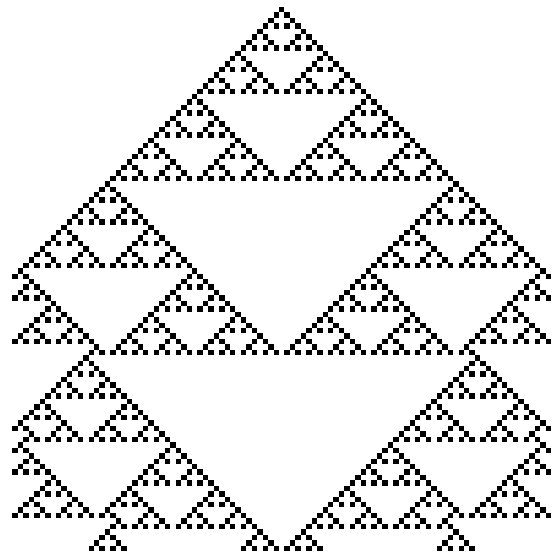

In [22]:
rule_number = 90  # select the update rule
size = 100  # number of cells in one row
steps = 100  # number of time steps
init_cond='impulse'  # start with only one cell
impulse_pos='center'  # start with the central cell
x_b = cellular_automata(rule_number, size, steps)

fig = plt.figure(figsize = (10,10))
ax = plt.axes()
ax.set_axis_off()

ax.imshow(x_b, interpolation='none', cmap = 'binary')
plt.savefig('elementary_cellular_automaton_test.png', dpi=300, bbox_inches='tight')

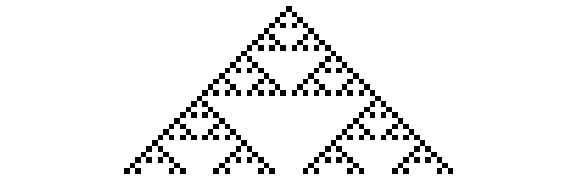

In [72]:
steps_to_show = 30
steps_in_y =15
Y_testb =np.zeros((steps_to_show,size),dtype=np.int8)

for i in range(steps_to_show):
    Y_testb[i,:]=x_b[i,:]


fig = plt.figure(figsize = (10,10))
ax = plt.axes()
ax.set_axis_off()

ax.imshow(Y_testb, interpolation='none', cmap = 'binary')
plt.savefig('elementary_cellular_automaton_test.png', dpi=300, bbox_inches='tight')

In [108]:
for i in range(4,8):
    print(i)

4
5
6
7
